In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [2]:
# 1. Load dataset
df = pd.read_csv('TrafficDataset.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10-10-2023,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10-10-2023,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10-10-2023,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10-10-2023,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10-10-2023,Tuesday,11,2,1,34,48,normal


In [3]:
# 2. Convert 'Date' column to datetime with day-first format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [4]:
# 3. Extract numeric features from 'Date'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfMonth'] = df['Date'].dt.day

In [5]:
# 4. Drop original 'Date'
df = df.drop('Date', axis=1)

In [6]:
# 5. Encode target column
le_target = LabelEncoder()
df['Traffic Situation'] = le_target.fit_transform(df['Traffic Situation'])
df.head()

,Time,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Year,Month,DayOfMonth
0,12:00:00 AM,Tuesday,13,2,2,24,41,3,2023,10,10
1,12:15:00 AM,Tuesday,14,1,1,36,52,3,2023,10,10
2,12:30:00 AM,Tuesday,10,2,2,32,46,3,2023,10,10
3,12:45:00 AM,Tuesday,10,2,2,36,50,3,2023,10,10
4,1:00:00 AM,Tuesday,11,2,1,34,48,3,2023,10,10


In [7]:
# 6. Convert 'Time' to numeric hour BEFORE selecting features and splitting
df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour

In [8]:
# 7. Drop 'Time' since it's string and we now have 'Hour'
df = df.drop('Time', axis=1)

In [9]:
# 8. Encode 'Day of the week'
le_day = LabelEncoder()
df['Day of the week'] = le_day.fit_transform(df['Day of the week'])
df.head()

,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Year,Month,DayOfMonth,Hour
0,5,13,2,2,24,41,3,2023,10,10,0
1,5,14,1,1,36,52,3,2023,10,10,0
2,5,10,2,2,32,46,3,2023,10,10,0
3,5,10,2,2,36,50,3,2023,10,10,0
4,5,11,2,1,34,48,3,2023,10,10,1


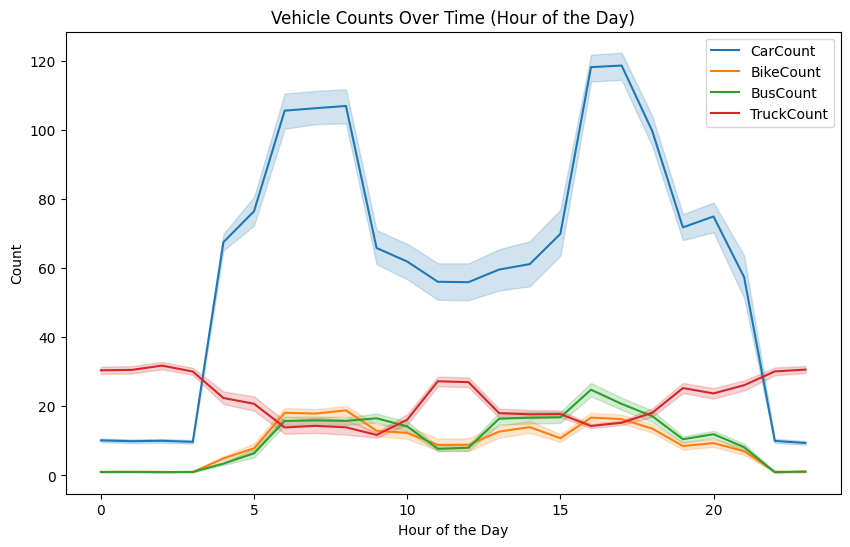

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Vehicle Counts Over Time (Hour of the Day)
plt.figure(figsize=(10, 6))
# Use the 'Hour' column which was created from 'Time'
sns.lineplot(data=df, x='Hour', y='CarCount', label='CarCount')
sns.lineplot(data=df, x='Hour', y='BikeCount', label='BikeCount')
sns.lineplot(data=df, x='Hour', y='BusCount', label='BusCount')
sns.lineplot(data=df, x='Hour', y='TruckCount', label='TruckCount')
plt.title('Vehicle Counts Over Time (Hour of the Day)')
plt.xlabel('Hour of the Day') # Update xlabel to reflect 'Hour'
plt.ylabel('Count')
plt.legend()
plt.show()

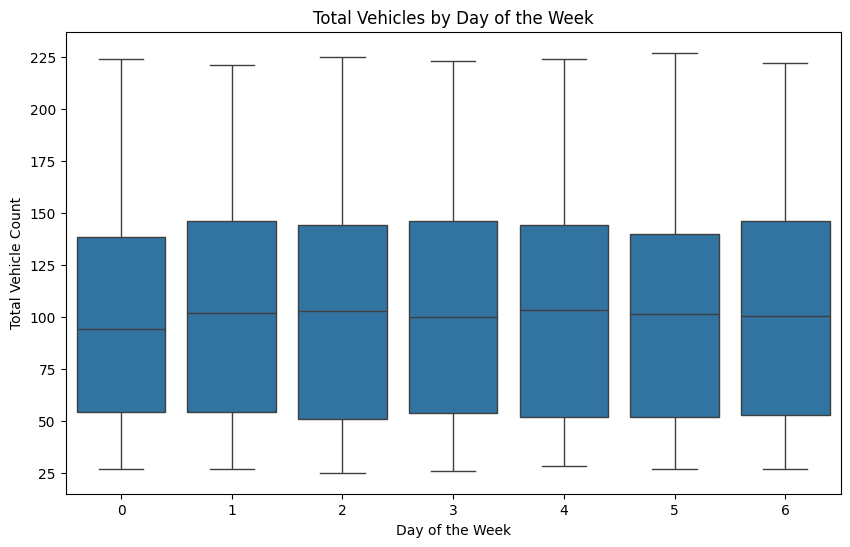

In [11]:
# 2. Total Vehicles by Day of the Week
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Day of the week', y='Total')
plt.title('Total Vehicles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Vehicle Count')
plt.show()

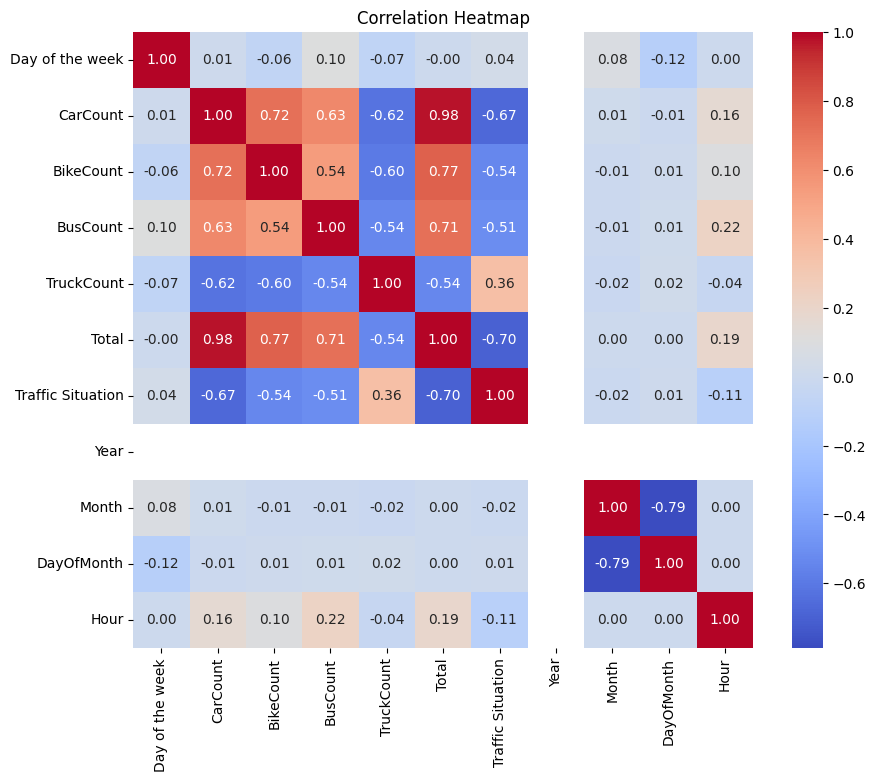

In [12]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

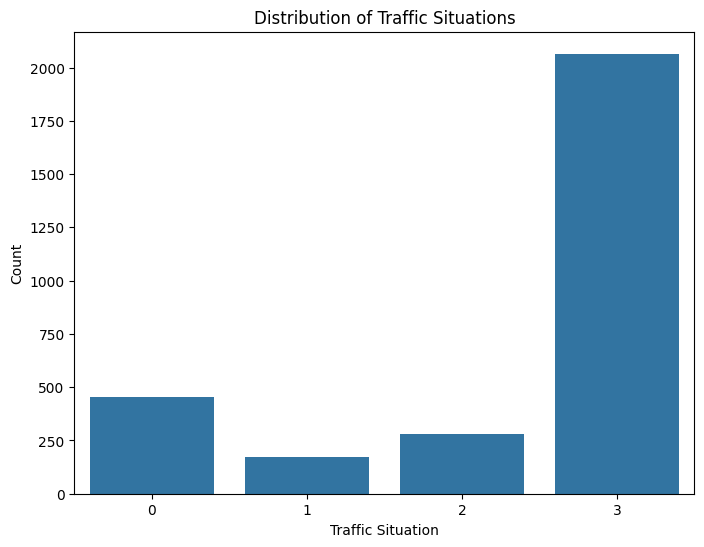

In [13]:
# 4. Traffic Situation Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

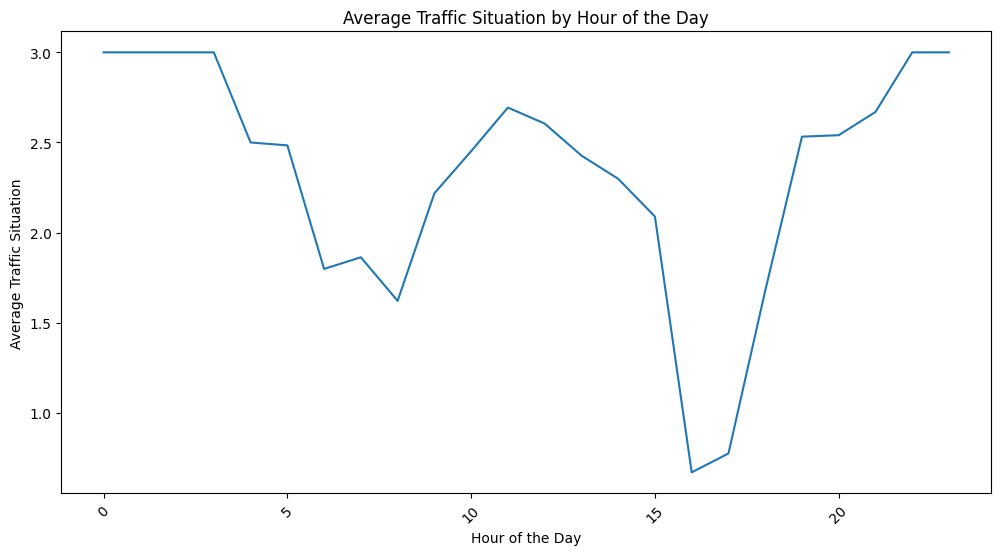

In [14]:
# Alternatively, a line plot to show average traffic situation over the hours
plt.figure(figsize=(12, 6))
avg_traffic_by_time = df.groupby('Hour')['Traffic Situation'].mean()
sns.lineplot(x=avg_traffic_by_time.index, y=avg_traffic_by_time.values)
plt.title('Average Traffic Situation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Situation')
plt.xticks(rotation=45)
plt.show()

In [15]:
# 9. Select features and target
X = df[['Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Year', 'Month', 'DayOfMonth', 'Hour']]
y = df['Traffic Situation']

In [16]:
# 10. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [17]:
# 11. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# 12. Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# 13. Predict and evaluate
y_pred = model.predict(X_test)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 79   1   0   6]
 [  2  32   0   5]
 [  1   0  52   0]
 [  8   2   3 405]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        86
           1       0.91      0.82      0.86        39
           2       0.95      0.98      0.96        53
           3       0.97      0.97      0.97       418

    accuracy                           0.95       596
   macro avg       0.93      0.92      0.92       596
weighted avg       0.95      0.95      0.95       596

Accuracy Score: 0.9530201342281879


In [20]:
df.shape

(2976, 11)

In [21]:
#
input_data = np.array([[5, 11, 2, 1, 34, 2023, 10, 10, 1]])
input_data_scaled = scaler.transform(input_data)
y_pred = model.predict(input_data_scaled)
print("Predicted Traffic Situation (encoded):", y_pred[0])
predicted_traffic_situation_label = le_target.inverse_transform(y_pred)
print("Predicted Traffic Situation:", predicted_traffic_situation_label[0])

Predicted Traffic Situation (encoded): 3
Predicted Traffic Situation: normal


In [22]:
import joblib

# Save both model and label encoder (used for decoding predictions)
joblib.dump((model, le_target), 'traffic_rf_model.pkl')


['traffic_rf_model.pkl']

In [23]:
from google.colab import files
files.download('traffic_rf_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>